# Chapter 3 - Linear Regression

This question involves the use of simple linear regression on the Auto data set.

Use the sm.OLS() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use
the summarize() function to print the results. Comment on the output.

In [49]:
# Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

In [2]:
# Read data

file = 'data/Auto.csv'
auto = pd.read_csv(file)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [4]:
# Find the number of missing values in each column in this dataset.

auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [5]:
auto['horsepower'] = auto['horsepower'].replace('?',np.nan)
auto.dropna(inplace = True)
auto['horsepower'] = auto['horsepower'].astype('float')

In [6]:
# Find the number of missing values in each column in this dataset.
auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [7]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [8]:
X = auto['horsepower']  # Predictor variable
y = auto['mpg']         # Response variable

# Convert to numpy arrays
X = np.asarray(X)
y = np.asarray(y)

# Add a constant to the predictor variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

# Add a constant to the predictor variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           7.03e-81
Time:                        18:58:25   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

**i. Is there a relationship between the predictor and the response?**

Yes, there is a relationship between the predictor (horsepower) and the response (mpg). This can be inferred from the coefficients of the linear regression model:

    The coefficient for horsepower is -0.1578. This indicates that for every one-unit increase in horsepower, the mpg decreases by approximately 0.1578 units.
    
    The p-value associated with the coefficient for horsepower is very small (P < 0.0001), indicating that the coefficient is statistically significant.

**ii. How strong is the relationship between the predictor and the response?**

The R-squared value is 0.606, which means that approximately 60.6% of the variability in mpg can be explained by the linear relationship with horsepower.

We can conclude that the relationship between horsepower and mpg is moderately strong.

**iii. Is the relationship between the predictor and the response positive or negative?**

The relationship between the predictor (horsepower) and the response (mpg) is negative.

This can be determined from the coefficient associated with the horsepower variable in the regression results. In the provided output, the coefficient for horsepower is -0.1578. Since this coefficient is negative, it indicates that there is a negative relationship between horsepower and mpg.

In other words, as horsepower increases, mpg tends to decrease, and vice versa.

**iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?**

In [9]:
#To predict the mpg associated with a horsepower of 98, we can use the regression equation obtained from the OLS results:

mpg = 39.9359 + (-0.1578 * 98)

print("Mpg:", round(mpg,2))

Mpg: 24.47


To calculate the 95% confidence and prediction intervals, we can use the get_prediction method of the regression model object.

In [27]:
# Create a new DataFrame with the intercept and horsepower
new_data = pd.DataFrame({'const': 1, 'horsepower': 98}, index=[0])

# Predict mpg for a horsepower of 98
prediction = model.get_prediction(new_data)

# Extract confidence intervals with 95% confidence
confidence_intervals = prediction.conf_int()

# Extract prediction intervals with 95% confidence
prediction_intervals = prediction.conf_int(alpha=0.05, obs=True)

# Print the results
print("\n95% Confidence Intervals:")
print(confidence_intervals)

print("\n95% Prediction Intervals:")
print(prediction_intervals)


95% Confidence Intervals:
[[23.97307896 24.96107534]]

95% Prediction Intervals:
[[14.80939607 34.12475823]]


In [32]:
# Given values
predicted_mpg = 24.4835  # Predicted mpg for horsepower of 98
standard_error = 0.006  # Standard error

# Critical t-value for a 95% confidence level
# Since we don't have exact degrees of freedom, we'll use a large sample approximation
# For a 95% confidence level, the critical t-value is approximately 1.96
critical_t_value = 1.96

# Calculate the margin of error
margin_of_error = critical_t_value * standard_error

# Calculate the confidence interval
lower_bound = predicted_mpg - margin_of_error
upper_bound = predicted_mpg + margin_of_error

# Print the confidence interval
print("95% Confidence Interval:")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

95% Confidence Interval:
Lower Bound: 24.47174
Upper Bound: 24.49526


**Plot the response and the predictor in a new set of axes ax. Use the `ax.axline()` method or the `abline()` function defined in the lab to display the least squares regression line.**

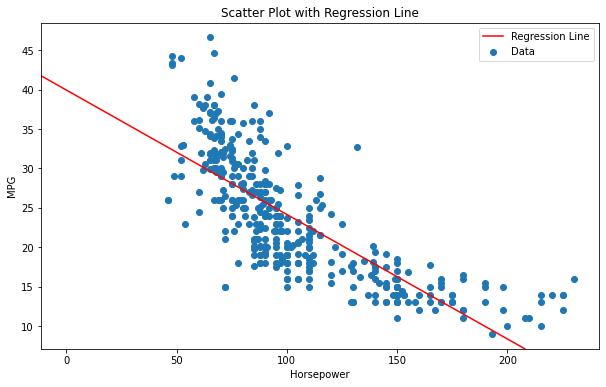

In [11]:
# Create a new figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data points
ax.scatter(auto['horsepower'], auto['mpg'], label='Data')

# Plot the least squares regression line
ax.axline((0, model.params[0]), slope=model.params[1], color='red', label='Regression Line')

# Set labels and title
ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG')
ax.set_title('Scatter Plot with Regression Line')

# Show legend
ax.legend()

# Show plot
plt.show()

**Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see
with the fit.**

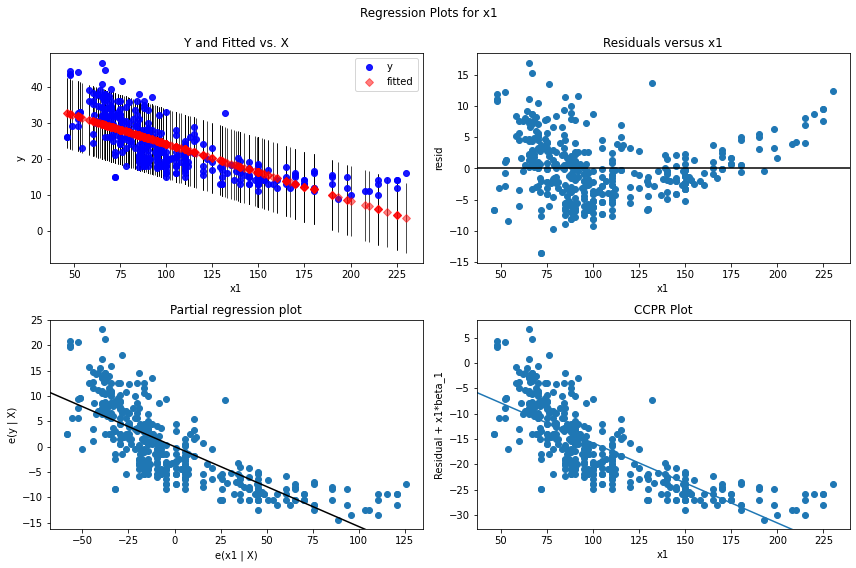


95% Prediction Intervals:
[[23.97307896 24.96107534]]


In [31]:
# Create a new data frame with the intercept and horsepower
new_data = pd.DataFrame({'const': 1, 'x1': [98]})  # Adjusted the variable name horsepower to 'x1'

# Create the regression model
model = sm.OLS(y, X).fit()

# Produce diagnostic plots
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_regress_exog(model, 'x1', fig=fig)  # Adjusted the variable name horsepower to 'x1'
plt.show()

# Predict mpg for a horsepower of 98
prediction = model.get_prediction(new_data)

# Extract prediction intervals with 95% confidence
prediction_intervals = prediction.conf_int(alpha=0.05)

# Print the results
print("\n95% Prediction Intervals:")
print(prediction_intervals)

## This question involves the use of multiple linear regression on the Auto data set.

**Produce a scatterplot matrix which includes all of the variables in the data set.**

In [33]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


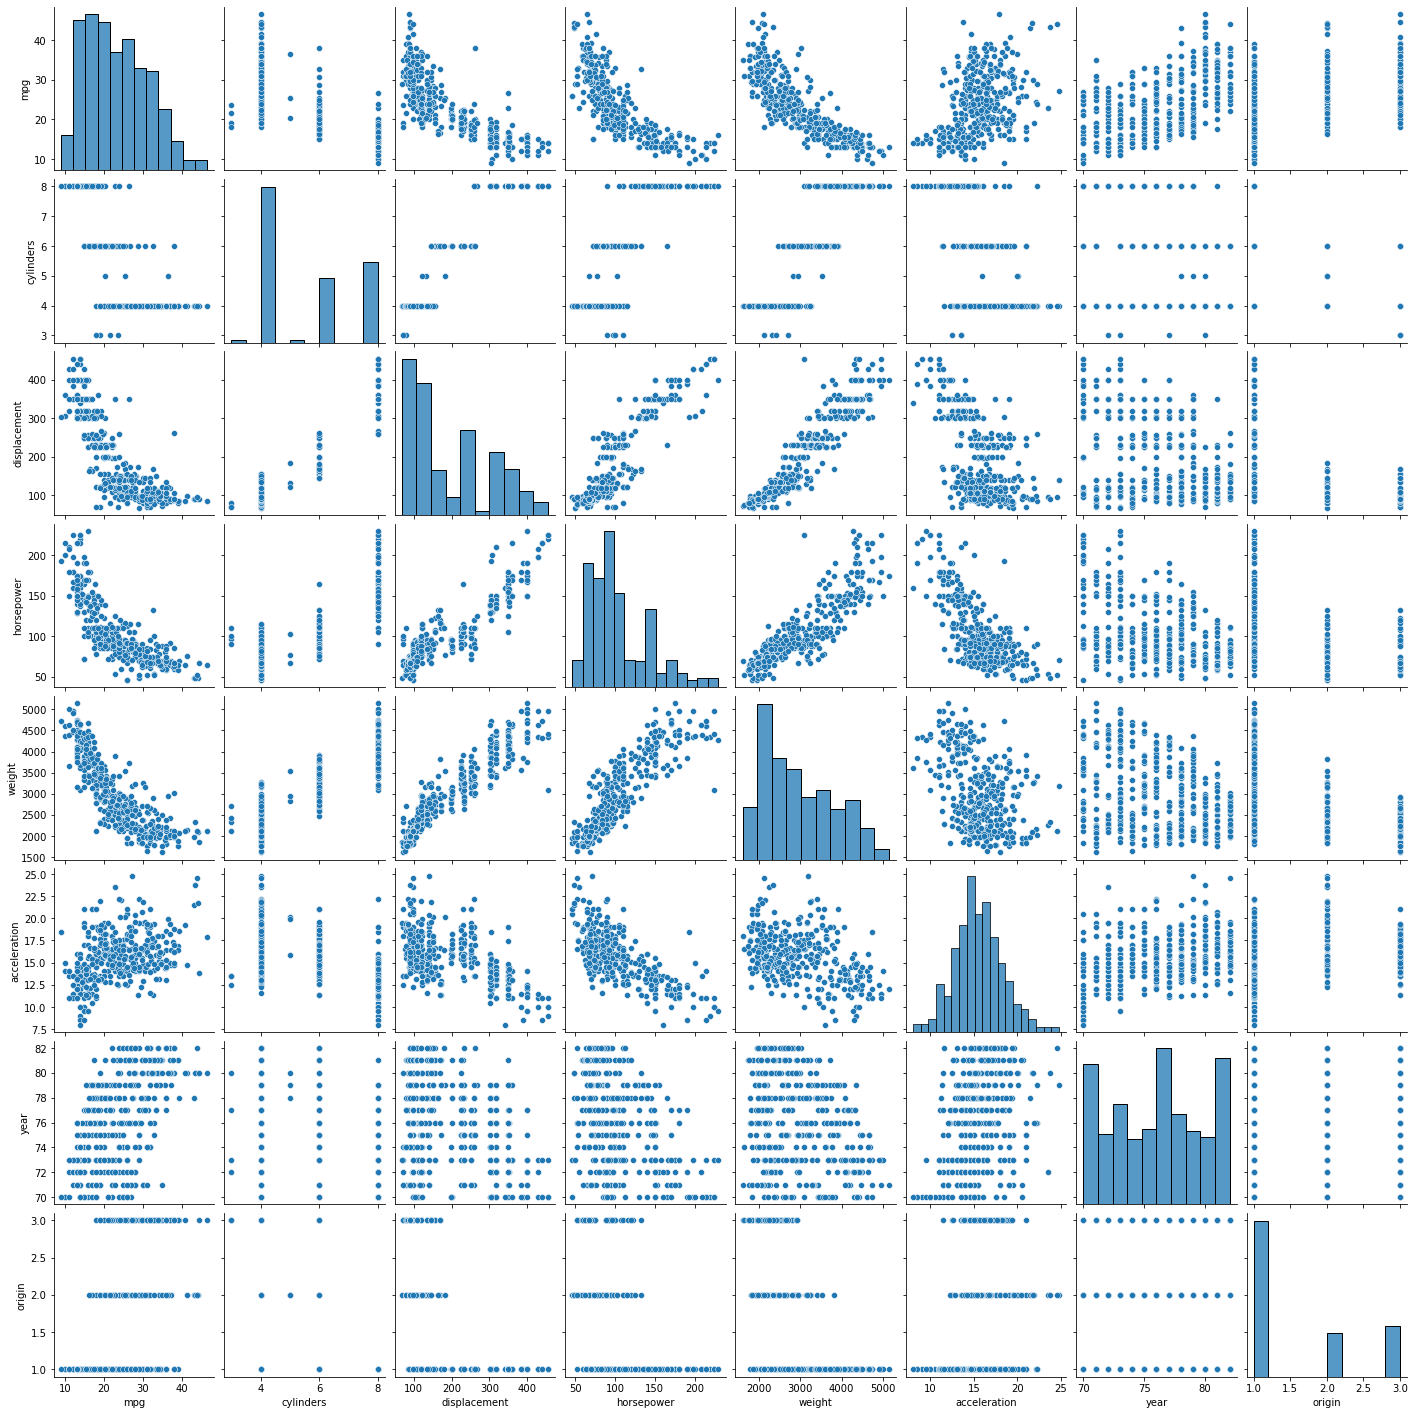

In [34]:
# Create pairwise scatterplots of data set

sns.pairplot(auto)

**Compute the matrix of correlations between the variables using the `DataFrame.corr()` method**

In [37]:
# Calculate the correlation matrix
corr_matrix = auto.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  

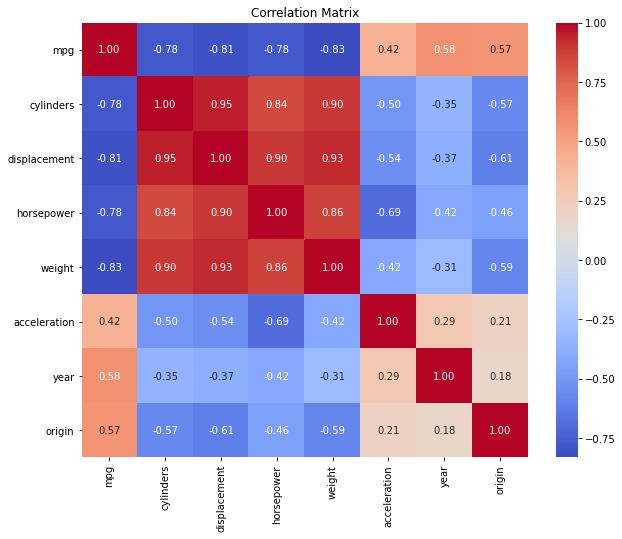

In [38]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Use the `sm.OLS()` function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the `summarize()` function to print the results. Comment on the output. 

In [40]:
# Get all column names
columns = auto.columns.tolist()
columns

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'year',
 'origin',
 'name']

In [48]:
# Convert non-numeric columns to numeric
auto[columns] = auto[columns].apply(pd.to_numeric, errors='coerce') #<=========== Important

# Drop rows with missing values
auto.dropna(inplace=True)

# Define response variable (mpg) and predictor variables
response_variable = auto['mpg']
predictor_variables = auto.drop(columns=['mpg', 'name'])

# Add constant term for the intercept
predictor_variables = sm.add_constant(predictor_variables)

# Fit the multiple linear regression model
model = sm.OLS(response_variable, predictor_variables).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          2.04e-139
Time:                        19:45:11   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

**i. Is there a relationship between the predictors and the response? Use the `anova_lm()` function from statsmodels to answer this question.**

In [50]:
# Fit the full model (with all predictors)
full_model = sm.OLS(auto['mpg'], predictor_variables).fit()

# Fit the reduced model (without any predictors)
reduced_model = sm.OLS(auto['mpg'], sm.add_constant(np.ones_like(auto['mpg']))).fit()

# Perform ANOVA test to compare the models
anova_results = anova_lm(reduced_model, full_model)

# Print ANOVA results
print(anova_results)

   df_resid           ssr  df_diff       ss_diff           F         Pr(>F)
0     391.0  23818.993469      0.0           NaN         NaN            NaN
1     384.0   4252.212530      7.0  19566.780939  252.428045  2.037106e-139


Based on the ANOVA results:

    The F-statistic is 252.43.
    The p-value (Pr(>F)) is approximately 2.04e-139, which is extremely small.

Since the p-value is much smaller than any reasonable significance level (e.g., 0.05), we reject the null hypothesis and conclude that adding the predictors significantly improves the model fit. Therefore, there is a relationship between the predictors (cylinders, displacement, horsepower, weight, acceleration, year, origin) and the response variable (mpg).

**ii. Which predictors appear to have a statistically significant relationship to the response?**

`displacement`, `weight`, `year`, and `origin` have p-values less than 0.05.`const`, representing the intercept term, also has a p-value less than 0.05.
    
Therefore, the predictors `displacement`, `weight`, `year`, and `origin` appear to have statistically significant relationships with the response variable `mpg`

**iii. What does the coefficient for the year variable suggest?**

In this case, the coefficient for the `year` variable is 0.7508. This suggests that, on average, for each one-year increase in the model year of the car, the mpg is expected to increase by approximately 0.7508 units, holding all other predictors constant.

Therefore, the coefficient for the year variable suggests a positive relationship between the model year of the car and its `mpg`, indicating that newer cars tend to have higher miles per gallon

**Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?**

C:\Users\Jack\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Jack\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


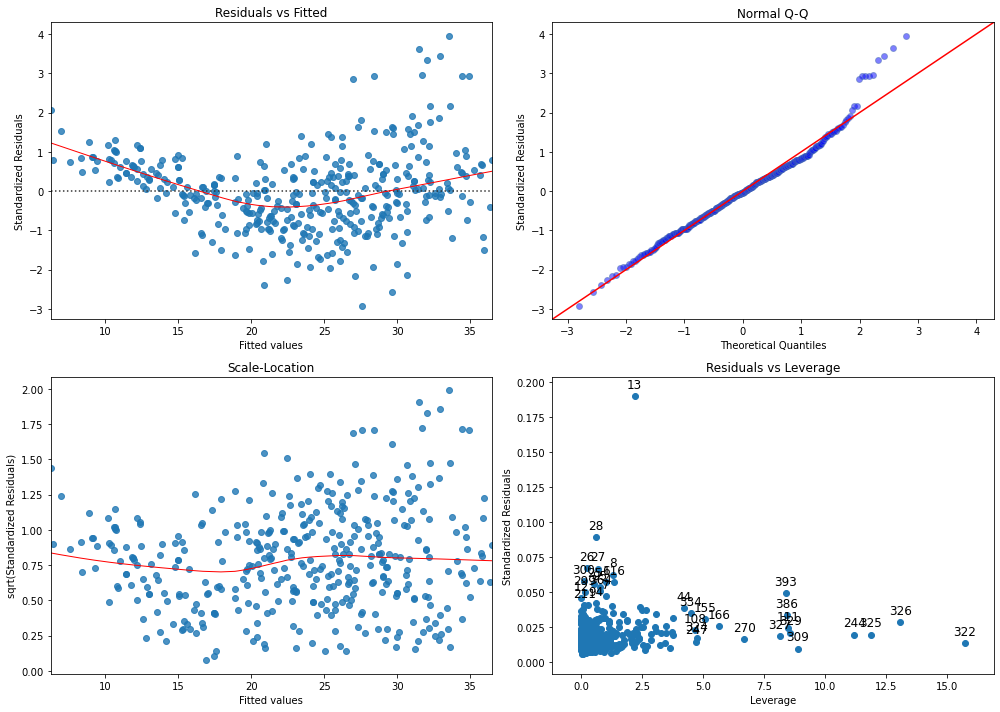

In [53]:
# Compute standardized residuals manually
standardized_residuals = model.get_influence().resid_studentized_internal

# Create ProbPlot object for the standardized residuals
QQ_residuals = ProbPlot(standardized_residuals)

# Create diagnostic plots
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Residuals vs. Fitted Values Plot
sns.residplot(model.fittedvalues, standardized_residuals, lowess=True, ax=ax[0, 0], line_kws={'color': 'red', 'lw': 1})
ax[0, 0].set_title('Residuals vs Fitted')
ax[0, 0].set_xlabel('Fitted values')
ax[0, 0].set_ylabel('Standardized Residuals')

# Normal Q-Q Plot of Standardized Residuals
QQ_residuals.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1, ax=ax[0, 1])
ax[0, 1].set_title('Normal Q-Q')
ax[0, 1].set_xlabel('Theoretical Quantiles')
ax[0, 1].set_ylabel('Standardized Residuals')

# Scale-Location Plot
sns.regplot(model.fittedvalues, np.sqrt(np.abs(standardized_residuals)), lowess=True, ax=ax[1, 0], line_kws={'color': 'red', 
                                                                                                             'lw': 1})
ax[1, 0].set_title('Scale-Location')
ax[1, 0].set_xlabel('Fitted values')
ax[1, 0].set_ylabel('sqrt(Standardized Residuals)')

# Residuals vs. Leverage Plot
sm.graphics.plot_leverage_resid2(model, ax=ax[1, 1])
ax[1, 1].set_title('Residuals vs Leverage')
ax[1, 1].set_xlabel('Leverage')
ax[1, 1].set_ylabel('Standardized Residuals')

plt.tight_layout()
plt.show()

**Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?**

In [54]:
from statsmodels.formula.api import ols

# Fit a model with interactions
model_interaction = ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year \
                            + origin + cylinders:weight + displacement:weight + horsepower:weight', data=auto).fit()

# Print the summary of the model
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     238.8
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          2.64e-157
Time:                        20:08:44   Log-Likelihood:                -972.46
No. Observations:                 392   AIC:                             1967.
Df Residuals:                     381   BIC:                             2011.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.7763    

The interaction term **horsepower:weight** has a p-value of 0.002, suggesting that it is statistically significant.
The interaction term **displacement:weight** has a p-value of 0.368, indicating that it is not statistically significant.
The interaction term **cylinders:weight** has a p-value of 0.932, which also suggests that it is not statistically significant.

Therefore, among the interaction terms included in the model, only **horsepower:weight** appears to have a statistically significant relationship with the response variable **mpg**. The other interaction terms, **displacement:weight** and **cylinders:weight**, do not seem to have a significant impact on **mpg**.

**Try a few different transformations of the variables, such as log(X), √X, X2. Comment on your findings.**

In [56]:
# Logarithmic Transformation
predictor_variables_log = np.log(predictor_variables)

# Square Root Transformation
predictor_variables_sqrt = np.sqrt(predictor_variables)

# Squared Transformation
predictor_variables_squared = predictor_variables ** 2

# Fit the linear regression models for each transformation
model_log = sm.OLS(auto['mpg'], sm.add_constant(predictor_variables_log)).fit()
model_sqrt = sm.OLS(auto['mpg'], sm.add_constant(predictor_variables_sqrt)).fit()
model_squared = sm.OLS(auto['mpg'], sm.add_constant(predictor_variables_squared)).fit()

# Print the summaries of the regression results
print("Logarithmic Transformation:")
print(model_log.summary())
print("\nSquare Root Transformation:")
print(model_sqrt.summary())
print("\nSquared Transformation:")
print(model_squared.summary())

Logarithmic Transformation:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     306.5
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          6.67e-153
Time:                        20:14:32   Log-Likelihood:                -991.70
No. Observations:                 392   AIC:                             1999.
Df Residuals:                     384   BIC:                             2031.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -66.5

    1.Logarithmic Transformation: We apply the natural logarithm function (np.log) to the predictor variable.
    2.Square Root Transformation: We apply the square root function (np.sqrt) to the predictor variable.
    3.Squared Transformation: We square the predictor variable (**2).

1. Logarithmic Transformation:

The R-squared value is 0.848, indicating that around 84.8% of the variance in the response variable (mpg) is explained by the predictors. Some coefficients have changed significantly compared to the original model, and their interpretations differ due to the logarithmic transformation. For example, the coefficient for year is 54.9857, suggesting that for each unit increase in the logarithm of the year, the mpg increases by approximately 55 units, holding other variables constant.

2. Square Root Transformation:

The R-squared value is 0.834, indicating that around 83.4% of the variance in the response variable is explained by the predictors. Similar to the logarithmic transformation, the coefficients have changed, and their interpretations differ.
For example, the coefficient for weight is -0.6217, suggesting that for each unit increase in the square root of weight, the mpg decreases by approximately 0.622 units, holding other variables constant.

3. Squared Transformation:

The R-squared value is 0.798, indicating that around 79.8% of the variance in the response variable is explained by the predictors. The interpretations of coefficients are different due to the squared transformation. For example, the coefficient for year is 0.0050, suggesting that for each unit increase in the square of the year, the mpg increases by approximately 0.005 units, holding other variables constant.

## This question should be answered using the Carseats data set.

In [105]:
# Read data

file = 'data/Carseats.csv'
carseat = pd.read_csv(file)
carseat.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [106]:
carseat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [107]:
print(carseat['Urban'].unique())

['Yes' 'No']


In [ ]:
print(carseat['US'].unique())

In [108]:
# Examination of observations by species using values_counts()

carseat['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [109]:
# Define the mapping dictionary
mapping = {'Yes': 1, 'No': 0}
mapping_shelve = {'Good': 1, 'Bad': 0, 'Medium': 0.5}

# Convert 'Urban', 'US', and 'ShelveLoc' columns
carseat['Urban'] = carseat['Urban'].map(mapping)
carseat['US'] = carseat['US'].map(mapping)
carseat['ShelveLoc'] = carseat['ShelveLoc'].map(mapping_shelve)

carseat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    float64
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 34.5 KB


In [110]:
carseat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    float64
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 34.5 KB


**Fit a multiple regression model to predict Sales using Price, Urban, and US.**

In [111]:
# Get all column names
columns = carseat.columns.tolist()
columns

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [112]:
# Find the number of missing values in each column in this dataset.

carseat.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [113]:
# Define response variable (mpg) and predictor variables
response_variable = carseat['Sales']
predictor_variables = carseat[['Price', 'Urban', 'US']]

# Add constant term for the intercept
predictor_variables = sm.add_constant(predictor_variables)

# Fit the multiple linear regression model
model = sm.OLS(response_variable, predictor_variables).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           2.39e-23
Time:                        21:03:48   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

**Const (Intercept):**

Coefficient (coef): 13.0435

Interpretation: When all predictor variables (Price, Urban, US) are zero, the expected value of Sales is 13.0435.

Practical Interpretation: This is the baseline level of Sales when all other predictors are absent. It represents the intercept of the regression line.

**Price:**

Coefficient (coef): -0.0545

Interpretation: For each one-unit increase in Price, the Sales decrease by 0.0545 units, holding other predictors constant.

Practical Interpretation: As the price of the product increases, the sales tend to decrease. This coefficient indicates the impact of Price on Sales.

**Urban:**

Coefficient (coef): -0.0219

Interpretation: For a unit change in the Urban predictor (e.g., from "No" to "Yes"), there is a change of -0.0219 units in Sales, holding other predictors constant.

Practical Interpretation: Being in an urban location has a negligible effect on Sales. This coefficient suggests that the Urban predictor doesn't have a significant impact on Sales, as indicated by its high p-value (0.936).

**US:**

Coefficient (coef): 1.2006

Interpretation: For a unit change in the US predictor (e.g., from "No" to "Yes"), there is a change of 1.2006 units in Sales, holding other predictors constant.

Practical Interpretation: Being in the US market has a significant positive impact on Sales. This coefficient suggests that being in the US market increases Sales by approximately 1.2006 units compared to not being in the US market.

**Write out the model in equation form, being careful to handle the qualitative variables properly.**

    Sales = 13.0435 - 0.0545 * Price - 0.0219 * Urban + 1.2006 * US + epsilon
    
    b0 = 13.0435 (Const)
    b1 = −0.0545 (Price)
    b2 = −0.0219 (Urban)
    b3 = 1.2006 (Us)

**For which of the predictors can you reject the null hypothesis**

**H0 : βj = 0?**

If the p-value for a predictor is less than the chosen significance level (commonly 0.05), then we reject the null hypothesis for that predictor. This indicates that the predictor has a statistically significant effect on the response variable.

For the predictor `Price`, the p-value is much less than 0.05 (it is given as 0.000), so we can reject the null hypothesis for Price. This suggests that Price has a statistically significant effect on Sales.

For the predictors `Urban` and `US`, the p-values are greater than 0.05 (0.936 and 0.000 respectively). Therefore, we fail to reject the null hypothesis for Urban, but we reject the null hypothesis for US. This indicates that Urban does not have a statistically significant effect on Sales, while US does have a statistically significant effect.

In summary, we can reject the null hypothesis for the `Price` and `US` predictors, but we fail to reject the null hypothesis for the `Urban` predictor.

**On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is
evidence of association with the outcome.**

Based on the results of the previous question, we can fit a smaller model that includes only the predictors "Price" and "US", as these are the predictors for which there is evidence of association with the outcome (Sales).

In [114]:
# Define response variable (Sales) and predictor variables
response_variable = carseat['Sales']
predictor_variables = carseat[['Price', 'US']]

# Add constant term for the intercept
predictor_variables = sm.add_constant(predictor_variables)

# Fit the multiple linear regression model
smaller_model = sm.OLS(response_variable, predictor_variables).fit()

# Print the summary of the regression results for the smaller model
print(smaller_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           2.66e-24
Time:                        21:23:17   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.0

The smaller model includes only the predictors "Price" and "US". Here's the interpretation of each coefficient in the model:

Intercept (const): The intercept represents the estimated sales when all predictors are set to zero. In this case, it represents the estimated sales when the price is zero and the product is not made in the US. However, this interpretation is not meaningful in the context of the data because price cannot be zero and the product is either made in the US or not.

Price: The coefficient for Price is -0.0545. This means that, holding all other variables constant, for every one unit increase in the price of the car seat, the sales decrease by 0.0545 units, on average.

US: The coefficient for US is 1.1996. This is interpreted as follows: when the product is made in the US (US=1), the sales are expected to be higher by approximately 1.1996 units compared to when the product is not made in the US (US=0), holding all other variables constant.

The p-values associated with both Price and US are less than 0.05, indicating that we can reject the null hypothesis (H0: βj = 0) for both predictors. Therefore, both Price and US are statistically significant predictors of Sales in this model.

**How well do the models in (a) and (e) fit the data?**

To assess how well the models fit the data, we typically look at the coefficient of determination (R^2) and the adjusted coefficient of determination (R^2adj).

For the first model (with all predictors "Price", "Urban", and "US"), the R^2 value is 0.239 and the adjusted R^2 is 0.234. This means that approximately 23.9% of the variance in the response variable (Sales) can be explained by the predictors included in the model. The adjusted R^2 takes into account the number of predictors in the model and provides a more conservative estimate of the model's goodness of fit.

For the second model (with only predictors "Price" and "US"), the R^2 value is 0.239 and the adjusted R^2 is 0.235. These values are slightly lower than the corresponding values for the first model. However, since the second model has fewer predictors, the adjusted R^2 penalizes less for the reduction in degrees of freedom, resulting in a slightly higher adjusted R^2 compared to the first model.

**Using the model from (e), obtain 95 % confidence intervals for the coefficient(s)**

For the coefficient of "Price", the 95% confidence interval is approximately (-0.065, -0.044).

For the coefficient of "US", the 95% confidence interval is approximately (0.692, 1.708).

These confidence intervals indicate the range of values within which we are 95% confident that the true population coefficient lies. Since the intervals do not contain zero, we can conclude that both "Price" and "US" are statistically significant predictors of "Sales" at the 0.05 level of significance.

**Is there evidence of outliers or high leverage observations in the model from (e)?**

    Residuals vs. Fitted: Checks for linearity and homoscedasticity.
    Normal Q-Q plot: Checks for normality of residuals.
    Scale-Location plot: Checks for homoscedasticity.
    Residuals vs. Leverage plot: Helps to identify influential observations.

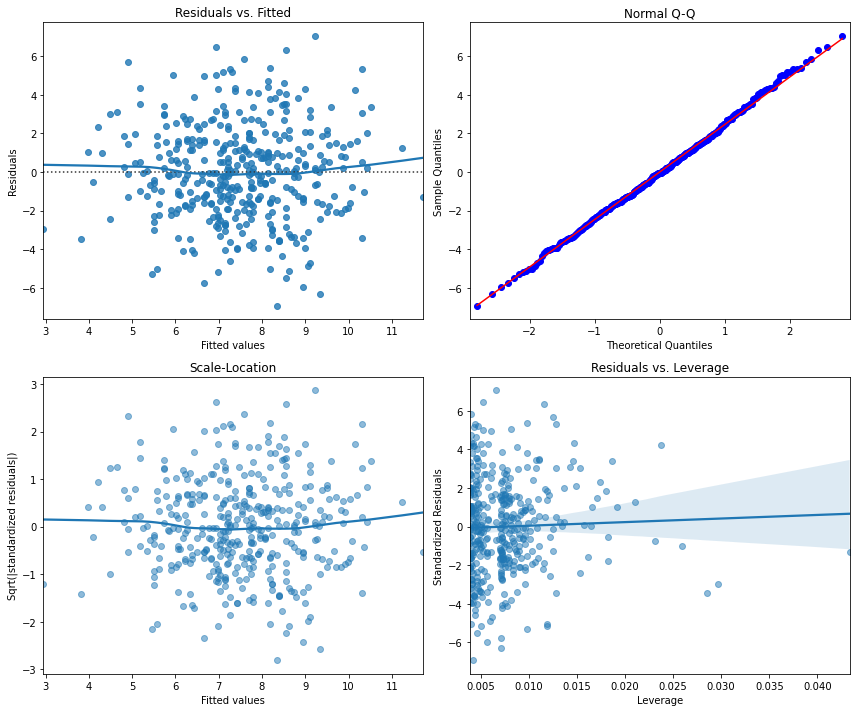

In [117]:
# Fit the second model
model = sm.OLS(response_variable, predictor_variables).fit()

# Plotting the diagnostic plots
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Residuals vs. Fitted
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, ax=ax[0, 0])
ax[0, 0].set_title('Residuals vs. Fitted')
ax[0, 0].set_xlabel('Fitted values')
ax[0, 0].set_ylabel('Residuals')

# Plot 2: QQ Plot
sm.qqplot(model.resid, line='s', ax=ax[0, 1])
ax[0, 1].set_title('Normal Q-Q')
ax[0, 1].set_xlabel('Theoretical Quantiles')
ax[0, 1].set_ylabel('Sample Quantiles')

# Plot 3: Scale-Location Plot (Sqrt Residuals vs. Fitted)
sns.regplot(x=model.fittedvalues, y=model.get_influence().resid_studentized_internal, 
                                                                        lowess=True, ax=ax[1, 0], scatter_kws={'alpha': 0.5})
ax[1, 0].set_title('Scale-Location')
ax[1, 0].set_xlabel('Fitted values')
ax[1, 0].set_ylabel('Sqrt(|standardized residuals|)')

# Plot 4: Residuals vs. Leverage
sns.regplot(x=model.get_influence().hat_matrix_diag, y=model.resid, ax=ax[1, 1], scatter_kws={'alpha': 0.5})
ax[1, 1].set_title('Residuals vs. Leverage')
ax[1, 1].set_xlabel('Leverage')
ax[1, 1].set_ylabel('Standardized Residuals')

plt.tight_layout()
plt.show()